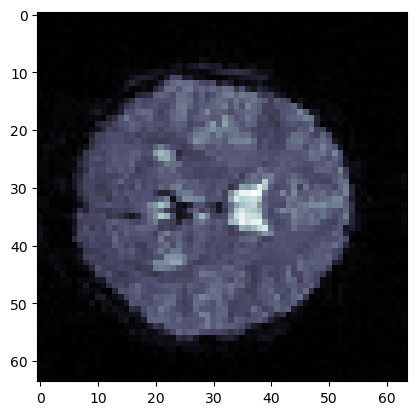

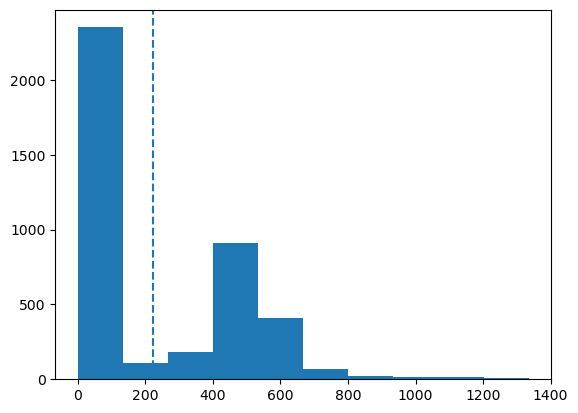

In [1]:
# 5.	From Section 15.1 of the Book: Using the code that we implemented above, implement code that 
# finds two threshold values to segment the brain slice into three different segments. Does this 
# adequately separate the ventricles from other brain tissue based on their intensity? Compare 
# the Dice and IoU score of your implementation to the results of Scikit Image’s 
# skimage.filters.threshold_multiotsu. (2.5’)

# from textbook 
from ndslib import load_data
brain = load_data("bold_volume")

slice10 = brain[:, :, 10]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(slice10, cmap="bone")

import numpy as np
mean = np.mean(slice10)
fig, ax = plt.subplots()
ax.hist(slice10.flat)
p = ax.axvline(mean, linestyle='dashed')

segmentation = np.zeros_like(slice10)
segmentation[slice10 > mean] = 1

fig, ax = plt.subplots()
ax.imshow(slice10, cmap="bone")
im = ax.imshow(segmentation, alpha=0.5)

In [ ]:
min_intraclass_variance = np.inf

for candidate in np.unique(slice10):
    foreground = slice10[slice10 < candidate]
    background = slice10[slice10 >= candidate]
    if len(foreground) and len(background):
        foreground_variance = np.var(foreground) * len(foreground)
        background_variance =  np.var(background) * len(background)
        intraclass_variance = foreground_variance + background_variance
        if intraclass_variance < min_intraclass_variance:
            min_intraclass_variance = intraclass_variance
            threshold = candidate
            
            
mean = np.mean(slice10)
fig, ax = plt.subplots()
ax.hist(slice10.flat)
ax.axvline(mean, linestyle='dashed')
p = ax.axvline(threshold, linestyle='dotted')

segmentation = np.zeros_like(slice10)
segmentation[slice10 > threshold] = 1

fig, ax = plt.subplots()
ax.imshow(slice10, cmap="bone")
p = ax.imshow(segmentation, alpha=0.5)